# Task 1: Sensitivity analysis of DL models to-wards dwelling ontologies 

Pratichhya Sharma

In order to understand the effect in performance for a multiclass segmentation due to several segmentation model I performed an experiment using Kutupalong dataset in bangladesh with 8 classes. They were: no dwellings, blue dwellings, red dwellings, green dwellings, bright dwellings, dark dwellings, iron roofed dwellings & dismantled dwellings.

In [1]:
# import packages
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import matplotlib.patches as mpatches

In [2]:
#function to plot
def visualize_data(image,label):
    f, axarr = plt.subplots(1,2)
    image = image[:, :, 0:3]
    _ = image[:, :, 0].copy()
    image[:, :, 0] = image[:, :, 2]
    image[:, :, 2] = _
    image = image.astype(np.float64)
    for i in range(image.shape[2]):
        p2, p98 = np.percentile(image[:, :, i], (2, 98))
        image[:, :, i] = exposure.rescale_intensity(image[:, :, i],
                                                      in_range=(p2, p98))
    axarr[0].imshow(image)
    axarr[0].set_title("Satellite image")

    a=axarr[1]
    values = np.unique(label.ravel())
    im = axarr[1].imshow(label[:,:,0])
    a.set_title("Labeled image")
    colors = [im.cmap(im.norm(value)) for value in values] 
    label = ["No Dwellings","Blue", "Bright Dwellings","Iron Roof Dwellings","Dark Dwellings","Dismantled Dwellings","Green Dwellings","Red Dwellings"]
    patches = [mpatches.Patch(color=colors[i], label=j) for i, j in zip(range(len(values)), label)]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

In [3]:
# used dataset
image = rasterio.open("dataloader/image/Kutupalong_13Feb2018_sub.tif").read()
label = rasterio.open("dataloader/label/Multiclass.tif").read()

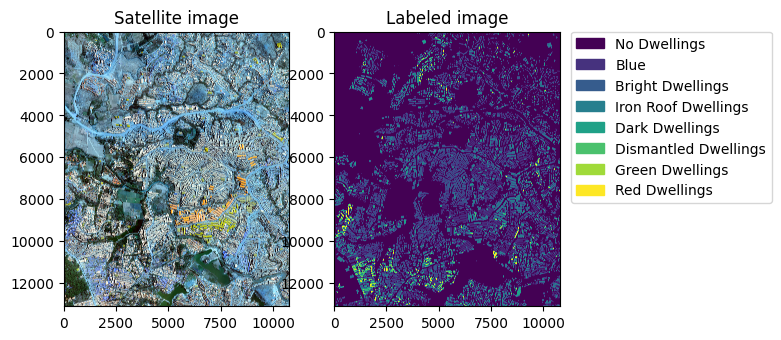

In [4]:
visualize_data(np.swapaxes(image,0,2), np.swapaxes(label,0,2))

Basic pre-processing steps were completed before performing a multiclass semantic segmentation. The model was only chosen because of its well-known capability. In order to determine how sensitive each DL model was to a dataset with a large number of classes, 6 different DL models were chosen and their performance was assessed. 

Due to time limitation, well-known pre-defined model for segmentation based on SoTA was selected from segmentation_models_pytorch python package https://segmentation-modelspytorch.readthedocs.io/en/latest/. Here we have:
<ol>
  <li>Unet</li>
  <li>UNet++ </li>https://ieeexplore.ieee.org/document/9482266 
  <li>Linknet</li> https://dl.acm.org/doi/10.1145/3423323.3423407 
  <li>PSPNet</li> https://www.hindawi.com/journals/mpe/2022/8958154/
  <li>DeepLabV3</li> https://arxiv.org/abs/1706.05587
  <li>DeepLabV3Plus</li> https://ieeexplore.ieee.org/document/9513102
</ol>

Furthermore, these models with resnet34 as backbone were trained and its f1 score was evaluated. Each models were trained for 5 times inorder to compare their obtain their consistency with the change in performace.

Additionally, the loss when the comparative loss function was observed for the model, plot shown below was observed. It shows that PSPnet converged fastest, followed by deeplabv3, deeplabv3+, unet and unet++. whereas Linknet convergence took some time in comparison to the others.

<img src=loss_function.png width="600" height="500">


In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv (r'trial.csv')
# removing any NAN rows
df = df.dropna(axis=0, how="any")
#rename
df.rename(columns={ df.columns[1]: "F1" }, inplace = True)
print (df)

            Model      F1
0            Unet  0.8265
1            Unet  0.8336
2            Unet  0.8312
3            Unet  0.7498
4            Unet  0.8306
5          Unet++  0.8154
6          Unet++  0.8179
7          Unet++  0.8214
8          Unet++  0.8313
9          Unet++  0.8308
10        Linknet  0.7616
11        Linknet  0.7835
12        Linknet  0.8168
13        Linknet  0.8203
14        Linknet  0.7828
15         PSPNet  0.8290
16         PSPNet  0.8214
17         PSPNet  0.7442
18         PSPNet  0.8291
19         PSPNet  0.7652
20      DeepLabV3  0.8067
21      DeepLabV3  0.8168
22      DeepLabV3  0.8174
23      DeepLabV3  0.8214
24      DeepLabV3  0.8141
25  DeepLabV3Plus  0.8335
26  DeepLabV3Plus  0.8326
27  DeepLabV3Plus  0.8231
28  DeepLabV3Plus  0.8242


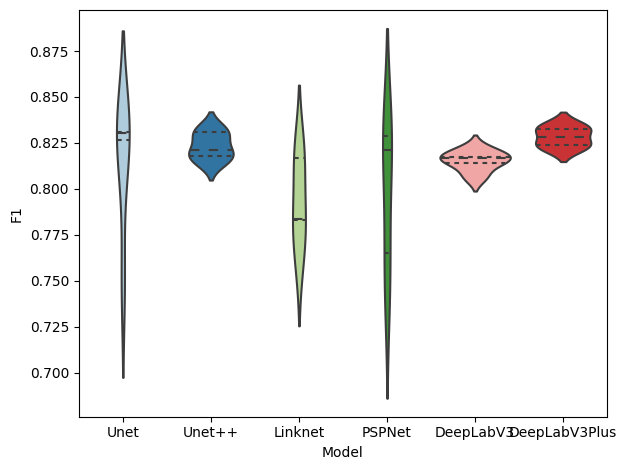

In [11]:
# sns.violinplot(data=df)
sns.violinplot(x="Model", y="F1", data=df,inner="quartile",palette="Paired",show=False)
plt.tight_layout()

Thus from the above violin plot, it was seen that Unet, Linknet,PSPNet is very sensitive to change in selection of multiclass dataset combination while Unet++, DeeplabV3 and Deeplabv3+ could